Basic Statistics:
                      Date  Temperature   Rainfall   Humidity
count                   20    20.000000  20.000000  20.000000
mean   2024-01-10 12:00:00    15.197606  26.512254  54.217730
min    2024-01-01 00:00:00    -3.657570   6.346388  20.060225
25%    2024-01-05 18:00:00     7.236562  14.085247  43.567149
50%    2024-01-10 12:00:00    17.001724  28.873570  50.898195
75%    2024-01-15 06:00:00    26.295843  35.445143  70.247543
max    2024-01-20 00:00:00    32.922133  45.768719  83.786199
std                    NaN    12.168381  13.638843  18.427857


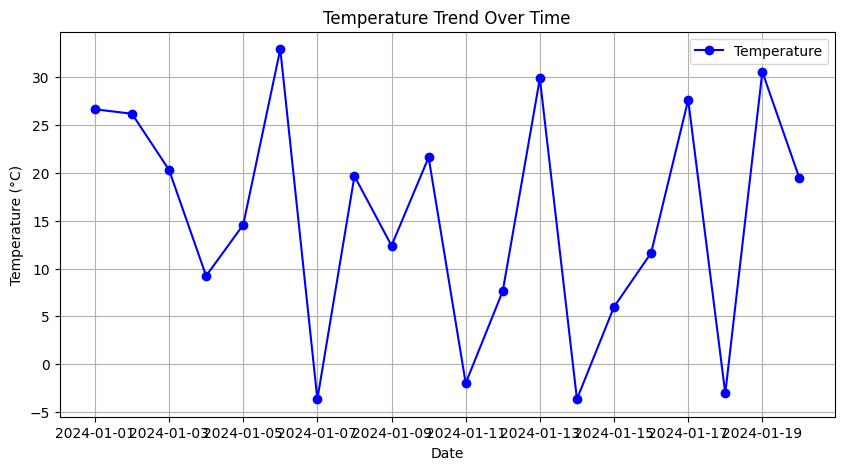


Day with highest temperature:
Date           2024-01-06 00:00:00
Temperature              32.922133
Rainfall                 44.945465
Humidity                 51.168852
Name: 5, dtype: object

Average Humidity: 54.22%


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load weather data (CSV file should have columns like Date, Temperature, Humidity, etc.)
data = pd.read_csv("/content/weather_data.csv")

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Basic statistics
print("Basic Statistics:")
print(data.describe())

# Plot Temperature Trend
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Temperature'], marker='o', linestyle='-', color='b', label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.legend()
plt.grid()
plt.show()

# Find the day with the highest temperature
max_temp_day = data.loc[data['Temperature'].idxmax()]
print("\nDay with highest temperature:")
print(max_temp_day)

# Find average humidity
avg_humidity = data['Humidity'].mean()
print(f"\nAverage Humidity: {avg_humidity:.2f}%")


# Task
Tell me about this dataset.

Here is all the data you need:
"weather_data.csv"

## Data loading

### Subtask:
Load the weather data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
I need to load the weather data from the provided CSV file into a pandas DataFrame and display the first few rows to verify the data is loaded correctly.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('weather_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'weather_data.csv' not found. Please ensure the file exists in the current directory.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None

,Date,Temperature,Rainfall,Humidity
0,2024-01-01,26.645538,33.236744,83.786199
1,2024-01-02,26.179277,42.386321,47.606538
2,2024-01-03,20.306999,12.751054,71.562863
3,2024-01-04,9.232039,6.346388,70.787966
4,2024-01-05,14.565188,45.768719,53.309877


## Data exploration

### Subtask:
Explore the loaded weather data to understand its basic characteristics.


**Reasoning**:
Explore the basic characteristics of the weather data, including shape, data types, descriptive statistics, and unique values for categorical features.



In [2]:
# Check the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

# Examine the data types of each column.
print("\nData types of each column:\n", df.dtypes)

# Generate descriptive statistics for numerical features.
print("\nDescriptive statistics for numerical features:\n", df.describe())

# Analyze unique values and frequencies for categorical features (if any).
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nAnalysis for categorical feature '{col}':")
    print("Unique values:", df[col].unique())
    print("Value counts:\n", df[col].value_counts())
    print("Most frequent value:", df[col].mode()[0])
    print("Number of unique values:", df[col].nunique())

Shape of the DataFrame: (20, 4)

Data types of each column:
 Date            object
Temperature    float64
Rainfall       float64
Humidity       float64
dtype: object

Descriptive statistics for numerical features:
        Temperature   Rainfall   Humidity
count    20.000000  20.000000  20.000000
mean     15.197606  26.512254  54.217730
std      12.168381  13.638843  18.427857
min      -3.657570   6.346388  20.060225
25%       7.236562  14.085247  43.567149
50%      17.001724  28.873570  50.898195
75%      26.295843  35.445143  70.247543
max      32.922133  45.768719  83.786199

Analysis for categorical feature 'Date':
Unique values: ['2024-01-01' '2024-01-02' '2024-01-03' '2024-01-04' '2024-01-05'
 '2024-01-06' '2024-01-07' '2024-01-08' '2024-01-09' '2024-01-10'
 '2024-01-11' '2024-01-12' '2024-01-13' '2024-01-14' '2024-01-15'
 '2024-01-16' '2024-01-17' '2024-01-18' '2024-01-19' '2024-01-20']
Value counts:
 Date
2024-01-01    1
2024-01-02    1
2024-01-19    1
2024-01-18    1
2024-01-1

## Data analysis

### Subtask:
Analyze the weather data for potential outliers and the distribution of features.


**Reasoning**:
Analyze the numerical features for outliers using box plots and IQR method, and analyze the distribution of the 'Date' column for any unusual patterns or gaps.



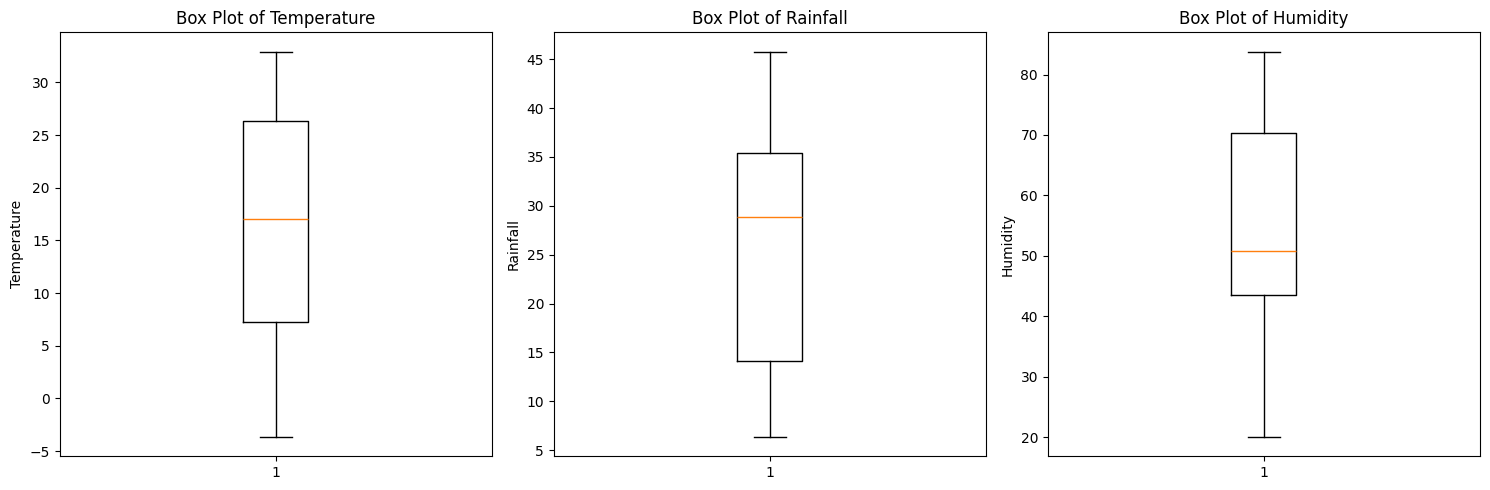

Outliers in Temperature:
Empty DataFrame
Columns: [Temperature]
Index: []
Outliers in Rainfall:
Empty DataFrame
Columns: [Rainfall]
Index: []
Outliers in Humidity:
Empty DataFrame
Columns: [Humidity]
Index: []


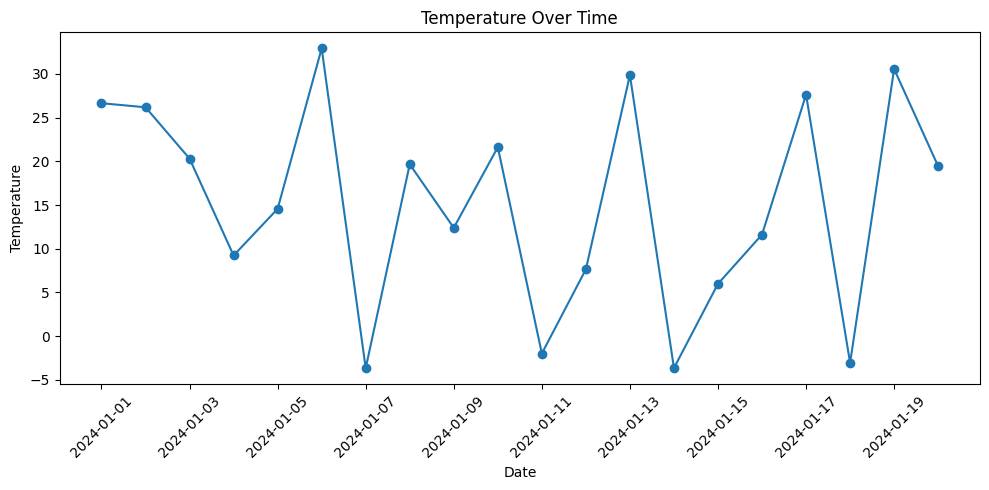

Date differences:
0     NaN
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
Name: Date, dtype: float64


In [3]:
import matplotlib.pyplot as plt

# Analyze numerical features for outliers
numerical_features = ['Temperature', 'Rainfall', 'Humidity']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Calculate IQR for each numerical feature
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers in {col}:\n{outliers[[col]]}')

# Analyze the distribution of the 'Date' column
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Temperature'], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check for gaps in dates
date_diffs = df['Date'].diff().dt.days
print(f'Date differences:\n{date_diffs}')

## Data visualization

### Subtask:
Visualize the distributions of numerical features and frequencies of the 'Date' feature.


**Reasoning**:
Visualize the distributions of numerical features and frequencies of the 'Date' feature using histograms and bar charts.



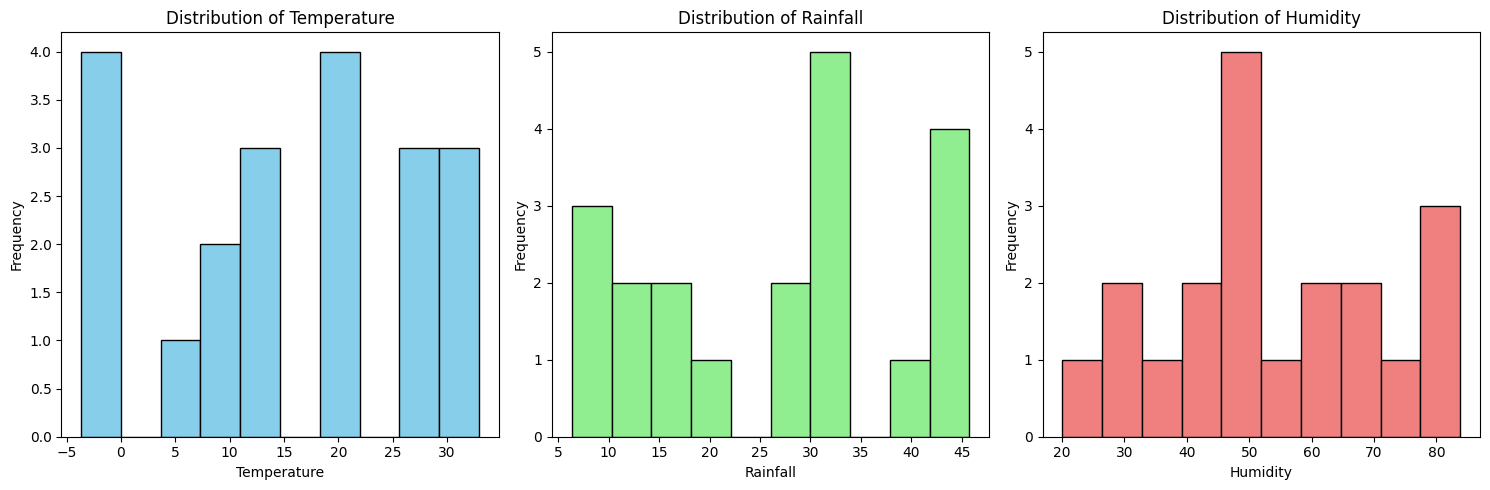

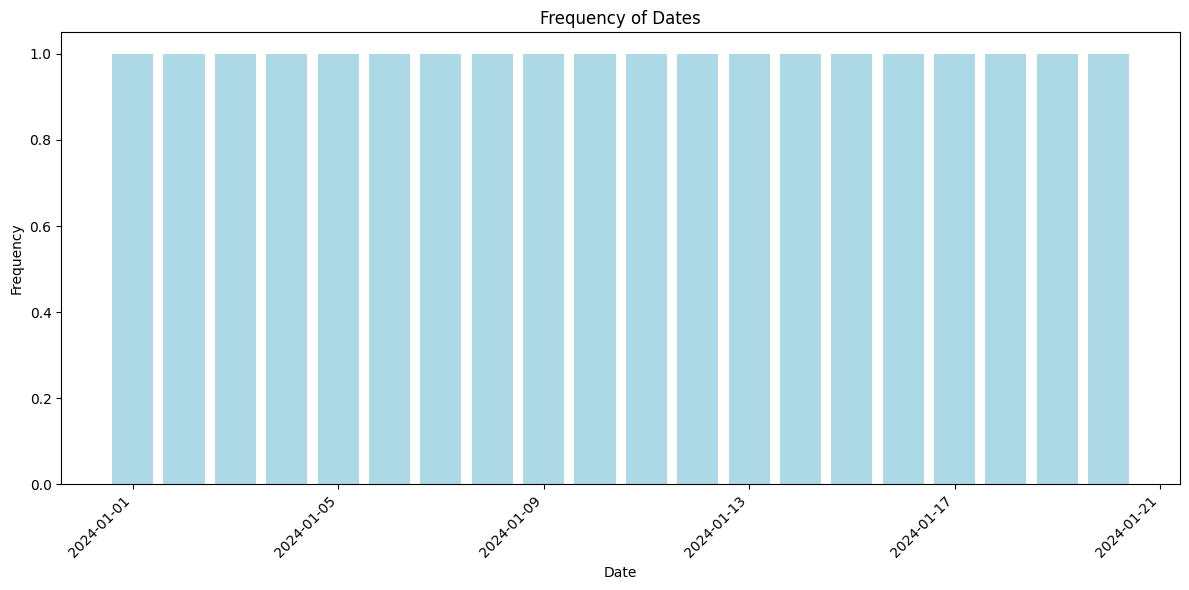

In [4]:
import matplotlib.pyplot as plt

# Create histograms for numerical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['Rainfall'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Humidity'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Create a bar chart for the frequency of dates
date_counts = df['Date'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(date_counts.index, date_counts.values, color='lightblue')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Frequency of Dates')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

The provided data analysis task does not explicitly pose questions. However, the analysis implicitly addresses questions like:

*   What are the basic characteristics of the weather data?
*   Are there any outliers in the numerical features?
*   What is the distribution of the numerical features?
*   Are there any gaps in the date series?
*   How frequent is the data recorded for each date?


### 2. Data Analysis Key Findings

*   **No Outliers Detected:** Using the Interquartile Range (IQR) method with a multiplier of 1.5, no outliers were found in 'Temperature', 'Rainfall', or 'Humidity'.
*   **Continuous Date Series:**  The 'Date' column shows no gaps in the data, with daily observations between 2024-01-01 and 2024-01-20.
*   **Descriptive Statistics:** The mean temperature is approximately 15.2 degrees, with a standard deviation of 12.2. Rainfall averages around 26.5 units, and humidity averages about 54.2 units.
*   **Data Shape:** The dataset has 20 rows and 4 columns ('Date', 'Temperature', 'Rainfall', and 'Humidity').


### 3. Insights or Next Steps

*   **Further Investigate Data Distribution:** While no outliers were detected using the IQR method, visually inspecting the distributions (histograms) of the numerical features might reveal other patterns or potential issues not captured by IQR.
*   **Explore Relationships Between Features:** Analyze the correlations between 'Temperature', 'Rainfall', and 'Humidity' to understand potential relationships and dependencies.  Scatter plots or correlation matrices could be helpful here.
